## Things to keep in mind: 

We want to find a way to group pitchers/pitches, so we don't have a computational nightmare: 

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
baseball_df = pd.read_pickle("data/baseball_data.pkl")

In [20]:
baseball_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,game_start,game_number,visscore,homscore
0,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,1,1.0,0,0.0,0.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,True,1,0.0,0.0
1,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,2,1.0,0,1.0,0.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
2,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,3,1.0,0,1.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
3,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,4,1.0,0,2.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
4,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,5,1.0,0,3.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706904,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,4,9.0,1,1.0,2.0,...,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park,False,2253,7.0,5.0
706905,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,5,9.0,1,1.0,2.0,...,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park,False,2253,7.0,5.0
706906,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,1,9.0,1,0.0,0.0,...,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park,False,2253,7.0,5.0
706907,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,2,9.0,1,0.0,1.0,...,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park,False,2253,7.0,5.0


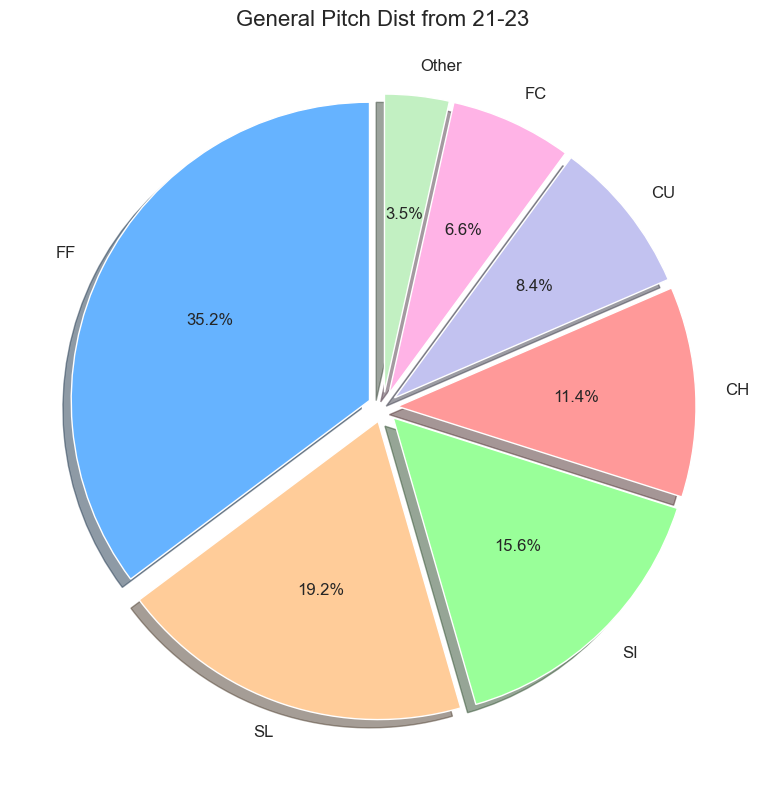

In [21]:
import matplotlib.pyplot as plt

# Count of strikeouts and fieldouts
eventtype_counts = baseball_df['pitchname'].value_counts()

# Define the threshold for grouping less frequent categories into "Other"
threshold = 0.05 * eventtype_counts.sum()  # 5% threshold

# Group small categories into "Other"
small_categories = eventtype_counts[eventtype_counts < threshold]
eventtype_counts_aggregated = eventtype_counts[eventtype_counts >= threshold]
eventtype_counts_aggregated['Other'] = small_categories.sum()

# Plot pie chart with improvements
plt.figure(figsize=(8, 8))
colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff9999', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb380']  # Updated color palette
explode = [0.05] * len(eventtype_counts_aggregated)  # Slightly explode each slice

# Create pie chart with improved readability
plt.pie(eventtype_counts_aggregated, labels=eventtype_counts_aggregated.index, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True, textprops={'fontsize': 12})

plt.title('General Pitch Dist from 21-23', fontsize=16)
plt.tight_layout()
plt.show()


In [22]:
baseball_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,game_start,game_number,visscore,homscore
0,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,1,1.0,0,0.0,0.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,True,1,0.0,0.0
1,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,2,1.0,0,1.0,0.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
2,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,3,1.0,0,1.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
3,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,4,1.0,0,2.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
4,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,5,1.0,0,3.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706904,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,4,9.0,1,1.0,2.0,...,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park,False,2253,7.0,5.0
706905,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,5,9.0,1,1.0,2.0,...,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park,False,2253,7.0,5.0
706906,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,1,9.0,1,0.0,0.0,...,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park,False,2253,7.0,5.0
706907,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,2,9.0,1,0.0,1.0,...,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park,False,2253,7.0,5.0


In [23]:
baseball_df.columns

Index(['gameid', 'GameDate', 'Date', 'Time', 'ab', 'pitchnum', 'inning',
       'teambat', 'balls', 'strikes', 'outs', 'pitcher', 'pitcherthrows',
       'batter', 'batterside', 'pitchresult', 'pitchresult_desc', 'eventtype',
       'pitchname', 'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name',
       'game_start', 'game_number', 'visscore', 'homscore'],
      dtype='object')

In [24]:
baseball_df['eventtype'].unique()

array(['ball', 'foul', 'walk', 'home_run', 'field_out', 'called_strike',
       'strikeout', 'blocked_ball', 'swinging_strike', 'force_out',
       'double', 'sac_fly', 'single', 'foul_bunt', 'sac_bunt',
       'field_error', 'stolen_base_2b', 'stolen_base_3b', 'hit_by_pitch',
       'foul_tip', 'wild_pitch', 'swinging_strike_blocked',
       'grounded_into_double_play', 'double_play', 'defensive_indiff',
       'triple', 'fielders_choice_out', 'missed_bunt', 'passed_ball',
       'catcher_interf', 'caught_stealing_2b', 'fielders_choice',
       'caught_stealing_3b', 'sac_fly_double_play',
       'strikeout_double_play', 'pitchout', 'balk', 'bunt_foul_tip',
       'triple_play', 'sac_bunt_double_play',
       'pickoff_caught_stealing_2b', 'intent_walk',
       'caught_stealing_home', 'foul_pitchout', nan, 'other_advance',
       'stolen_base_home'], dtype=object)

/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_84146/2689466113.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pressure_df['velocity_group'] = pd.cut(


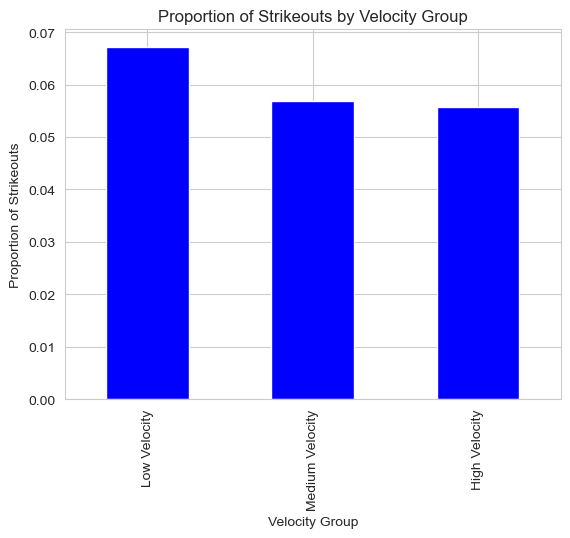

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for high-pressure situations (2 strikes)
high_pressure_df = baseball_df[baseball_df['strikes'] == 2.0]

# Select relevant columns
high_pressure_df = baseball_df[['outs', 'ab', 'eventtype', 'strikes', 'Home', 'spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocheight', 'pitchname']]

# Create velocity bins
high_pressure_df['velocity_group'] = pd.cut(
    high_pressure_df['relspeed'], 
    bins=[0, 85, 92, float('inf')], 
    labels=['Low Velocity', 'Medium Velocity', 'High Velocity']
)

# Calculate the total count of events for each velocity bin
total_counts = high_pressure_df.groupby('velocity_group')['eventtype'].count()

# Calculate the count of strikeouts for each velocity bin
strikeout_counts = high_pressure_df[high_pressure_df['eventtype'] == 'strikeout'].groupby('velocity_group')['eventtype'].count()

# Calculate the proportion of strikeouts in each bin
strikeout_proportion = strikeout_counts / total_counts

# Plot the proportions as a bar chart
strikeout_proportion.plot(kind='bar', color='blue')
plt.ylabel('Proportion of Strikeouts')
plt.xlabel('Velocity Group')
plt.title('Proportion of Strikeouts by Velocity Group')
plt.show()

In [26]:
high_pressure_df.head()

,outs,ab,eventtype,strikes,Home,spinrate,relspeed,horzbreak,inducedvertbreak,platelocheight,pitchname,velocity_group
0,0.0,1,ball,0.0,Chicago Cubs,2999.669678,86.140533,7.899302,20.196724,3.118610,FF,Medium Velocity
1,0.0,1,foul,0.0,Chicago Cubs,1940.164917,87.235016,3.684525,20.294086,1.945728,FF,Medium Velocity
2,0.0,1,ball,1.0,Chicago Cubs,1917.869019,88.147263,7.670026,18.184725,3.548406,FF,Medium Velocity
3,0.0,1,ball,1.0,Chicago Cubs,1925.806152,86.482887,7.343168,19.395239,2.435223,FF,Medium Velocity
4,0.0,1,foul,1.0,Chicago Cubs,1931.498047,86.576782,5.351965,17.362413,2.654030,FF,Medium Velocity


In [27]:
high_pressure_df = baseball_df[baseball_df['strikes'] == 2.0]

fieldout_types = ['field_out', 'force_out', 'grounded_into_double_play', 'fielders_choice_out', 'fielders_choice', 'double_play', 'sac_fly', 'sac_bunt', 'sac_fly_double_play', 'triple_play']

complements = []


high_pressure_df = high_pressure_df[['outs', 'ab', 'eventtype', 'strikes', 'Home', 'spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocheight']]


high_pressure_df['outcome'] = high_pressure_df['eventtype'].apply(
    lambda x: 'Strikeout' if 'strikeout' in x 
              else 'Fieldout' if x in fieldout_types 
              else 'Other'
)

# high_pressure_df['outcome'].value_counts()
high_pressure_df.head()

,outs,ab,eventtype,strikes,Home,spinrate,relspeed,horzbreak,inducedvertbreak,platelocheight,outcome
5,0.0,1,walk,2.0,Chicago Cubs,2015.944580,88.284363,7.333196,18.720329,1.308547,Other
15,1.0,4,strikeout,2.0,Chicago Cubs,2810.889404,73.927353,-17.103693,-8.812824,0.529289,Strikeout
25,0.0,7,ball,2.0,Chicago Cubs,2378.343994,87.884544,-8.061210,2.532754,2.838501,Other
26,0.0,7,force_out,2.0,Chicago Cubs,2580.304199,81.100067,-10.842525,-5.288368,1.470312,Fieldout
32,1.0,8,foul,2.0,Chicago Cubs,2473.718018,89.575226,-1.570178,4.174967,2.104113,Other


In [28]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming your dataframe is high_pressure_df and these are the columns to scale
columns_to_scale = ['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocheight']

# Initialize the MinMaxScaler with the feature_range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the selected columns
scaled_values = scaler.fit_transform(high_pressure_df[columns_to_scale])

# Create a copy of the original dataframe
scaled_df = high_pressure_df.copy()

# Replace the original columns with the scaled values
scaled_df[columns_to_scale] = scaled_values

# Display the first few rows of the new dataframe with scaled values
scaled_df.head()


,outs,ab,eventtype,strikes,Home,spinrate,relspeed,horzbreak,inducedvertbreak,platelocheight,outcome
5,0.0,1,walk,2.0,Chicago Cubs,0.118999,0.525837,0.457403,0.224560,-0.080848,Other
15,1.0,4,strikeout,2.0,Chicago Cubs,0.561137,0.075750,-0.110002,-0.560038,-0.193052,Strikeout
25,0.0,7,ball,2.0,Chicago Cubs,0.320561,0.513303,0.099957,-0.236729,0.139448,Other
26,0.0,7,force_out,2.0,Chicago Cubs,0.432889,0.300612,0.035378,-0.459603,-0.057556,Fieldout
32,1.0,8,foul,2.0,Chicago Cubs,0.373607,0.566305,0.250674,-0.189932,0.033704,Other


In [29]:
only_outs_df = high_pressure_df[high_pressure_df['outcome'] != 'Other']

high_pressure_df.head()

,outs,ab,eventtype,strikes,Home,spinrate,relspeed,horzbreak,inducedvertbreak,platelocheight,outcome
5,0.0,1,walk,2.0,Chicago Cubs,2015.944580,88.284363,7.333196,18.720329,1.308547,Other
15,1.0,4,strikeout,2.0,Chicago Cubs,2810.889404,73.927353,-17.103693,-8.812824,0.529289,Strikeout
25,0.0,7,ball,2.0,Chicago Cubs,2378.343994,87.884544,-8.061210,2.532754,2.838501,Other
26,0.0,7,force_out,2.0,Chicago Cubs,2580.304199,81.100067,-10.842525,-5.288368,1.470312,Fieldout
32,1.0,8,foul,2.0,Chicago Cubs,2473.718018,89.575226,-1.570178,4.174967,2.104113,Other


- Spin rate on its own doesn't look crazily different between strikeouts and other results

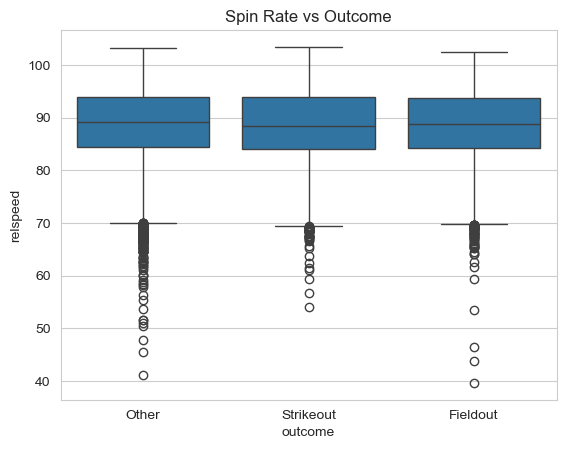

In [30]:
# Boxplot of spin rate by outcome
sns.boxplot(x='outcome', y='relspeed', data=high_pressure_df)
plt.title('Spin Rate vs Outcome')
plt.show()

# Pairplot to explore relationships between all features and the outcome
# sns.pairplot(only_outs_df, hue='outcome', vars=['spinrate', 'horzbreak', 'inducedvertbreak', 'relspeed'])
# plt.show()



<Axes: >

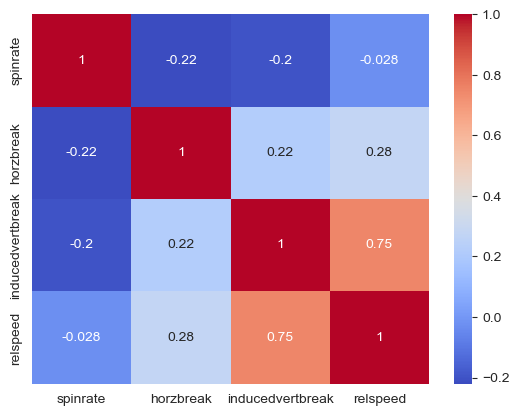

In [31]:
# corr_matrix = high_pressure_df[['spinrate', 'horzbreak', 'inducedvertbreak', 'relspeed']].corr()
corr_matrix = only_outs_df[['spinrate', 'horzbreak', 'inducedvertbreak', 'relspeed']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


## Seeing if scaled values are any different

/Users/nathanglen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


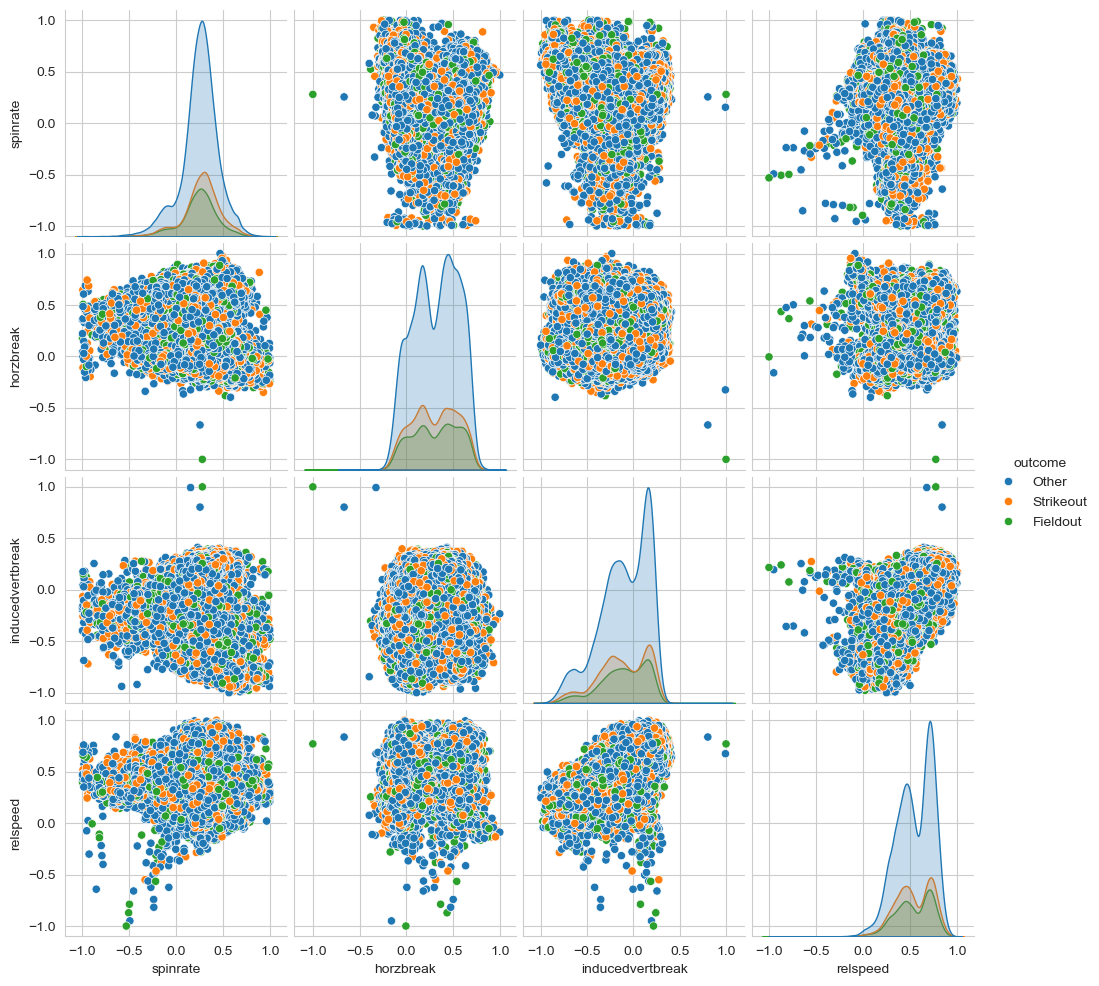

In [32]:
sns.pairplot(scaled_df, hue='outcome', vars=['spinrate', 'horzbreak', 'inducedvertbreak', 'relspeed'])
plt.show()

<Axes: >

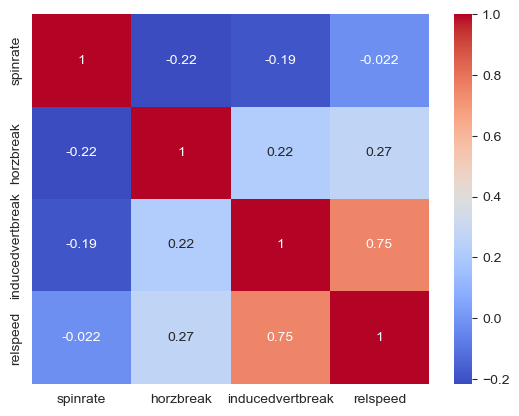

In [33]:
corr_matrix = scaled_df[['spinrate', 'horzbreak', 'inducedvertbreak', 'relspeed']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [34]:
high_pressure_df['outcome']

5             Other
15        Strikeout
25            Other
26         Fieldout
32            Other
            ...    
706890    Strikeout
706900     Fieldout
706904        Other
706905     Fieldout
706908    Strikeout
Name: outcome, Length: 209443, dtype: object

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select relevant features and outcome
X = high_pressure_df[['spinrate', 'horzbreak', 'inducedvertbreak', 'relspeed']]
y = high_pressure_df['outcome']  # This should be your categorical outcome (Strikeout, Groundout, Other)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit multinomial logistic regression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Model accuracy
accuracy = log_reg.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy}")

# Coefficients (importance of each feature)
coefficients = log_reg.coef_
print(f"Coefficients: {coefficients}")


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Trying to Create Groupings for Pitchers

### Option 1: Grouping by Velocity/SpinRate

In [ ]:
# https://rocklandpeakperformance.com/baseball-pitches-a-comprehensive-guide/#:~:text=In%20major%20league%20baseball%2C%20a,high%2080's%20to%20100%2B%20MPH.

# I don't know what good velocities are for these bins, have to do some more research

# Create velocity bins
baseball_df['velocity_group'] = pd.cut(
    baseball_df['relspeed'], 
    bins=[0, 85, 92, float('inf')], 
    labels=['Low Velocity', 'Medium Velocity', 'High Velocity']
)

# Create spin rate bins
baseball_df['spinrate_group'] = pd.cut(
    baseball_df['spinrate'], 
    bins=[0, 2000, 2500, float('inf')], 
    labels=['Low Spin', 'Medium Spin', 'High Spin']
)

baseball_df['spinrate_group'].dtype
baseball_df['velocity_group'].dtype
# baseball_df.head()

# baseball_df['velocity_group'] = baseball_df['velocity_group'].fillna('Unknown')
# baseball_df['spinrate_group'] = baseball_df['spinrate_group'].fillna('Unknown')

# # Group pitchers based on both criteria
baseball_df['pitcher_group'] = baseball_df['velocity_group'].astype(str) + ' / ' + baseball_df['spinrate_group'].astype(str)
# 
baseball_df[['pitcher','pitchname', 'velocity_group', 'spinrate_group', 'pitcher_group']]
# baseball_df[['pitcher', 'velocity_group', 'spinrate_group', 'pitcher_group']].sort_values(by='pitcher')

### Option 2: Getting Proportions of Innings that the pitchers have pitched in  

In [ ]:
pitcher_inning_counts = baseball_df.groupby(['pitcher', 'inning']).size().reset_index(name='inning_count')

# Group by pitcher to get total innings pitched for each pitcher
pitcher_total_innings = pitcher_inning_counts.groupby('pitcher')['inning_count'].sum().reset_index(name='total_innings')

# Merge total innings back into the inning counts df
pitcher_inning_proportions = pd.merge(pitcher_inning_counts, pitcher_total_innings, on='pitcher')

# Calculate the proportion of innings pitched for each pitcher in each inning
pitcher_inning_proportions['proportion'] = pitcher_inning_proportions['inning_count'] / pitcher_inning_proportions['total_innings']

# Sort by pitcher and inning
pitcher_inning_proportions = pitcher_inning_proportions.sort_values(by=['pitcher', 'inning'])

pitcher_inning_proportions.head()

In [ ]:
def get_proportion_table(df, pitcher_name):
    # Filter the DataFrame by the specified pitcher name
    pitcher_df = df[df['pitcher'] == pitcher_name]
    
    # Calculate the proportion of innings pitched
    proportion_table = pitcher_df[['inning', 'inning_count', 'total_innings', 'proportion']]
    
    return proportion_table

result = get_proportion_table(pitcher_inning_proportions, 'Burnes, Corbin')
print(result)

In [ ]:
def plot_proportion(df, pitcher_name):
    # Get the proportion table for the given pitcher
    proportion_table = get_proportion_table(df, pitcher_name)
    
    plt.figure(figsize=(10, 6))
    plt.plot(proportion_table['inning'], proportion_table['proportion'], marker='o', linestyle='-', color='b', label=f'Proportion of innings - {pitcher_name}')
    
    # Add labels and title
    plt.xlabel('Inning')
    plt.ylabel('Proportion of Innings Pitched')
    plt.title(f'Inning Proportions for {pitcher_name}')
    plt.grid(True)
    plt.legend()
    
    plt.show()

def plot_pmf(df, pitcher_name):
    # Get the proportion table for the given pitcher
    proportion_table = get_proportion_table(df, pitcher_name)
    
    # Plot the PMF (treating the 'proportion' as the PMF values)
    plt.figure(figsize=(10, 6))
    plt.bar(proportion_table['inning'], proportion_table['proportion'], color='b', alpha=0.7)
    
    # Add labels and title
    plt.xlabel('Inning')
    plt.ylabel('Probability')
    plt.title(f'PMF of Inning Proportions for {pitcher_name}')
    plt.grid(True)
    
    # Show the plot
    plt.show()

In [ ]:
# Example usage
plot_pmf(pitcher_inning_proportions, 'Abad, Fernando')

In [ ]:
plot_pmf(pitcher_inning_proportions, 'Scherzer, Max')

In [ ]:
plot_pmf(pitcher_inning_proportions, 'Suter, Brent')